# KNN benchmark

This notebook repeats the KNN benchmark reported in Smith et al.

In [1]:
from collections import OrderedDict
import os
from pathlib import Path
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import roc_auc_score, accuracy_score
import torch
from utilities import hdf_keys, NestedCV

In [2]:
DATA_PATH = Path("/data/pfizer_tx")

Benchmark classification tasks only

In [3]:
classification_strings = ['stage', 'grade', 'GSE']
all_classification_files = [f for f in os.listdir(DATA_PATH/"tasks_all_clr")\
                            if any([e in f for e in classification_strings])]

Work up a cross-validated classifier on a trial dataset: `all_clr_train_LUAD_stage.h5`

In [4]:
all_classification_files[0]

'all_clr_train_LUAD_stage.h5'

In [5]:
test_data_path = DATA_PATH/"tasks_all_clr"/all_classification_files[0]
keys = hdf_keys(test_data_path)
print(keys)
test_data = {key : pd.read_hdf(test_data_path, key = key) for key in keys}

['/expression', '/labels']


NestedCV is a class that takes a simple `model` function and a dict of hyperparameters.   
The `model` function is a wrapper that instantiates a model object with a scikit learn interface.

In [6]:
hparams = dict()
hparams['k'] = [1, 2, 3, 4, 5]

def model(params):
    return KNN(n_neighbors=params['k'], n_jobs=-1)

In [7]:
nestedCV = NestedCV(model, hparams)
performance, best_params = nestedCV.train(test_data['/expression'], test_data['/labels'])

Number of inner splits (product of all hparam values): 5
Fold 1
Fitting model with params: {'k': 1}
Fitting model with params: {'k': 2}
Fitting model with params: {'k': 3}
Fitting model with params: {'k': 4}
Fitting model with params: {'k': 5}
Best params: {'k': 5}, training final model
Fold 2
Fitting model with params: {'k': 1}
Fitting model with params: {'k': 2}
Fitting model with params: {'k': 3}
Fitting model with params: {'k': 4}
Fitting model with params: {'k': 5}
Best params: {'k': 2}, training final model
Fold 3
Fitting model with params: {'k': 1}
Fitting model with params: {'k': 2}
Fitting model with params: {'k': 3}
Fitting model with params: {'k': 4}
Fitting model with params: {'k': 5}
Best params: {'k': 5}, training final model
Fold 4
Fitting model with params: {'k': 1}
Fitting model with params: {'k': 2}
Fitting model with params: {'k': 3}
Fitting model with params: {'k': 4}
Fitting model with params: {'k': 5}
Best params: {'k': 1}, training final model
Fold 5
Fitting mode

In [13]:
performance

[0.5322853279242732,
 0.5125850340136054,
 0.6399169837426496,
 0.560341820718521,
 0.5687500000000001]

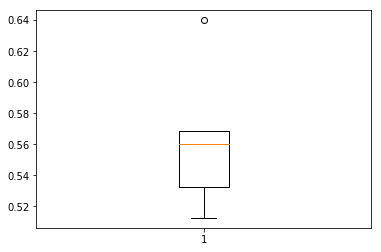

In [14]:
plt.boxplot(performance);

In [15]:
print(f"Final average model performance: {np.mean(performance)}")
print(f"Reported performance: {0.587241122}")

Final average model performance: 0.5627758332798098
Reported performance: 0.587241122
